In [7]:
import binance
import pandas as pd
import datetime
import numpy as np
import time
from binance.client import Client

import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates

import plotly.graph_objects as go

In [8]:
#Set up your own API Key!! Just for you, I put mine
#Use this link to see how to set up your own API Key: https://python-binance.readthedocs.io/en/latest/overview.html#installation

api_key = 'Your_Key'
api_secret = 'Your_Secret'

client = Client(api_key, api_secret)

BinanceAPIException: APIError(code=0): Service unavailable from a restricted location according to 'b. Eligibility' in https://www.binance.com/en/terms. Please contact customer service if you believe you received this message in error.

In [4]:
def updateTickers():
    tickers = client.get_all_tickers()
    tickers = pd.DataFrame(tickers)
    tickers.to_csv("Ticker Symbols.csv", index = 0)
    return

In [5]:
def read_tickers():
    tickers = pd.read_csv("Ticker Symbols.csv").symbol.transpose().values.tolist()
    return(tickers)

tickers = read_tickers()

In [6]:
def convertDateTime(x):
    return(datetime.datetime.fromtimestamp(int(str(x)[:10])))

In [7]:
def updateKLinesHistorical(tickers, date1, date2):
    for x in tickers:
        data = client.get_historical_klines(x, Client.KLINE_INTERVAL_4HOUR, date1, date2)
        columnNames = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore']
        data = pd.DataFrame(data, columns = columnNames)
        data['Open Time'] = data['Open Time'].apply(convertDateTime)
        data['Close Time'] = data['Close Time'].apply(convertDateTime)
        data.to_csv("KLines Data Historical/" + x + ".csv", index = 0)
        time.sleep(1)
    return
        

In [8]:
def updateKLinesCurrent(tickers):
    for x in tickers:
        data = client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_4HOUR)
        columnNames = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore']
        data = pd.DataFrame(data, columns = columnNames)
        data['Open Time'] = data['Open Time'].apply(convertDateTime)
        data['Close Time'] = data['Close Time'].apply(convertDateTime)
        data.to_csv("KLines Data Current/" + x + ".csv", index = 0)
        time.sleep(1)
    return

In [9]:
def viewCandles(ticker, time):
    plt.style.use('ggplot')
    if time.lower() == "current":
        time = 'Current'
    else:
        time = 'Historical'
        
    # Extracting Data for plotting
    data = pd.read_csv('KLines Data ' + time + '/' + ticker + '.csv')
    ohlc = data.loc[:, ['Open Time', 'Open', 'High', 'Low', 'Close']]
    ohlc['Open Time'] = pd.to_datetime(ohlc['Open Time'])
    ohlc['Open Time'] = ohlc['Open Time'].apply(mpl_dates.date2num)
    ohlc = ohlc.astype(float)

    # Creating Subplots
    fig, ax = plt.subplots()

    candlestick_ohlc(ax, ohlc.values, width=0.1, colorup='green', colordown='red', alpha=0.8)

    # Setting labels & titles
    ax.set_xlabel('Open Time')
    ax.set_ylabel('Price')
    fig.suptitle('Daily Candlestick Chart of ' + ticker)

    # Formatting Date
    date_format = mpl_dates.DateFormatter('%d-%m-%Y-%S')
    ax.xaxis.set_major_formatter(date_format)
    fig.autofmt_xdate()

    fig.tight_layout()

    plt.show()
    return(data)

In [10]:
def interactive_candles(data):
    figure = go.Figure(
            data = [
                go.Candlestick(
                    x = data['Open Time'],
                    low = data['Low'],
                    high = data['High'],
                    close = data['Close'],
                    open = data['Open'],
                    increasing_line_color = 'green',
                    decreasing_line_color = 'red'
                )
            ]
    )
    return(figure)

In [11]:
updateTickers()
tickers = read_tickers()

In [12]:
tickers = ["BTCUSDT"] + tickers[:5] #comment out if all tickers desired
dates = ["1 Jan, 2020", "1 Jul, 2021"] #set dates in this format
updateKLinesCurrent(tickers)
updateKLinesHistorical(tickers, dates[0], dates[1])

In [13]:
tickers

['BTCUSDT', 'ETHBTC', 'LTCBTC', 'BNBBTC', 'NEOBTC', 'QTUMETH']

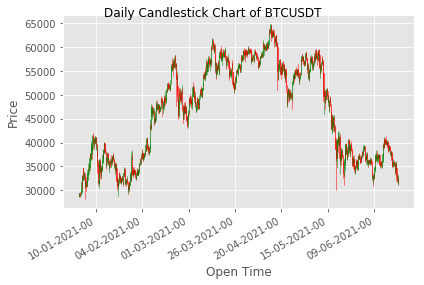

In [69]:
data = viewCandles('BTCUSDT', 'Historical')

In [81]:
chart = interactive_candles(data)

chart.update_layout(xaxis_rangeslider_visible = False)

In [82]:
data = data[['Open Time', 'Open', 'High', 'Low', 'Close']]
data['Open Time'] = pd.to_datetime(data['Open Time'])

In [80]:
data.head()

,Open Time,Open,High,Low,Close
0,2020-12-31 19:00:00,28923.63,29470.00,28690.17,29278.40
1,2020-12-31 23:00:00,29278.41,29395.00,28806.54,29092.83
2,2021-01-01 03:00:00,29092.84,29402.57,28872.24,29313.49
3,2021-01-01 07:00:00,29313.49,29600.00,29030.14,29188.67
4,2021-01-01 11:00:00,29188.67,29360.00,28624.57,29029.04


In [153]:
test = pd.DataFrame([[1,0],[2,3],[4,4]], columns = ['A','B'])
test

,A,B
0,1,0
1,2,3
2,4,4


In [154]:
test['C'] = test.A > test.B


In [155]:
test

,A,B,C
0,1,0,True
1,2,3,False
2,4,4,False


In [18]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('1/1/2000', periods=1000),
                  columns=['A', 'B', 'C', 'D'])



In [8]:
df2 = df.cumsum()
# df.rolling(window=60).sum().plot(subplots=True)

In [20]:
def rollingMax(x):
    return(x.max())

In [21]:
df['E'] = df['D'].rolling(window = 3).apply(rollingMax)
df.head(20)

,A,B,C,D,E
2000-01-01,0.353641,-1.950700,0.277773,-0.960307,NaN
2000-01-02,-0.755179,-0.429698,1.012698,1.789855,NaN
2000-01-03,1.792516,-0.114017,0.402263,0.226636,1.789855
2000-01-04,-0.434060,-0.409951,-1.168097,0.615814,1.789855
2000-01-05,0.245729,-0.810276,0.473111,-1.662203,0.615814
2000-01-06,-0.063257,0.423744,-0.017061,-0.631112,0.615814
2000-01-07,-0.242253,-1.513449,-0.637743,0.317315,0.317315
2000-01-08,-0.713217,0.428931,-0.580858,-0.516112,0.317315
2000-01-09,-0.762076,-0.402325,0.030153,-0.188076,0.317315
2000-01-10,-0.312211,1.325165,-0.377273,0.945939,0.945939


In [9]:
df2.head()

,A,B,C,D
2000-01-01,1.061133,0.404986,0.464485,-0.997658
2000-01-02,-0.832275,1.523549,0.349524,-1.681661
2000-01-03,-0.532468,1.782861,-0.483515,-3.098182
2000-01-04,-1.266349,2.100764,-1.907531,-2.297899
2000-01-05,-0.031169,0.822957,-1.532273,-1.298536


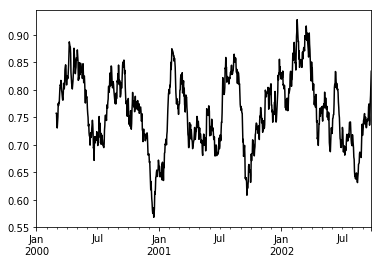

In [10]:
s = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))

def mad(x):
    return np.fabs(x - x.mean()).mean()

s.rolling(window=60).apply(mad, raw=True).plot(style='k')

In [12]:
df['E'] = s.rolling(window=60).apply(mad, raw=True)

In [16]:
df.iloc[58:,:]

,A,B,C,D,E
2000-02-28,-0.843505,0.473269,0.407019,0.131226,NaN
2000-02-29,0.292426,0.283625,0.320013,0.695791,0.757635
2000-03-01,-1.062227,-0.647587,2.108333,-2.040186,0.757177
2000-03-02,0.031722,-1.322732,-0.530851,-0.461095,0.732849
2000-03-03,-1.102977,1.391038,-0.201189,0.077480,0.730838
...,...,...,...,...,...
2002-09-22,0.879038,-0.327211,0.057696,2.024370,0.744897
2002-09-23,-0.414378,-1.219762,0.850422,-2.483609,0.777914
2002-09-24,-0.564699,-1.489956,-0.424977,1.334936,0.789920
2002-09-25,-0.703542,-0.093418,0.426926,-0.300019,0.809628


In [21]:
data = pd.read_csv('KLines Data Historical/BTCUSDT.csv')
data.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore
0,2020-01-01 01:00:00,7195.24,7245.00,7175.46,7225.01,2833.749180,2020-01-01 04:59:59,2.044590e+07,32476,1548.865619,1.117659e+07,0
1,2020-01-01 05:00:00,7225.00,7236.27,7199.11,7209.83,2061.295051,2020-01-01 08:59:59,1.489018e+07,29991,1049.711236,7.582850e+06,0
2,2020-01-01 09:00:00,7209.83,7237.73,7180.00,7197.20,3166.654361,2020-01-01 12:59:59,2.280732e+07,33507,1562.344314,1.125370e+07,0
3,2020-01-01 13:00:00,7197.20,7255.00,7196.15,7234.19,3492.537459,2020-01-01 16:59:59,2.523556e+07,36549,2086.279119,1.507671e+07,0
4,2020-01-01 17:00:00,7234.20,7249.99,7214.00,7229.48,2980.583291,2020-01-01 20:59:59,2.156177e+07,32877,1673.060594,1.210416e+07,0


In [39]:
from datetime import datetime

def to_datetime(x):
    datetime_object = datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    return(datetime_object)

def get_weekday(x):
    return(x.weekday())


In [37]:
data['Time'] = data['Open Time'].apply(to_datetime)

In [41]:
data['Weekday'] = data['Time'].apply(get_weekday)

In [44]:
data.head(20)

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Asset Volume,Taker Buy Quote Asset Volume,Ignore,Time,Weekday
0,2020-01-01 01:00:00,7195.24,7245.00,7175.46,7225.01,2833.749180,2020-01-01 04:59:59,2.044590e+07,32476,1548.865619,1.117659e+07,0,2020-01-01 01:00:00,2
1,2020-01-01 05:00:00,7225.00,7236.27,7199.11,7209.83,2061.295051,2020-01-01 08:59:59,1.489018e+07,29991,1049.711236,7.582850e+06,0,2020-01-01 05:00:00,2
2,2020-01-01 09:00:00,7209.83,7237.73,7180.00,7197.20,3166.654361,2020-01-01 12:59:59,2.280732e+07,33507,1562.344314,1.125370e+07,0,2020-01-01 09:00:00,2
3,2020-01-01 13:00:00,7197.20,7255.00,7196.15,7234.19,3492.537459,2020-01-01 16:59:59,2.523556e+07,36549,2086.279119,1.507671e+07,0,2020-01-01 13:00:00,2
4,2020-01-01 17:00:00,7234.20,7249.99,7214.00,7229.48,2980.583291,2020-01-01 20:59:59,2.156177e+07,32877,1673.060594,1.210416e+07,0,2020-01-01 17:00:00,2
5,2020-01-01 21:00:00,7229.48,7242.98,7175.15,7200.85,2257.568823,2020-01-02 00:59:59,1.627372e+07,28610,1026.694653,7.403777e+06,0,2020-01-01 21:00:00,2
6,2020-01-02 01:00:00,7200.77,7212.50,7120.37,7129.61,3739.354832,2020-01-02 04:59:59,2.678956e+07,41321,1739.234443,1.246310e+07,0,2020-01-02 01:00:00,3
7,2020-01-02 05:00:00,7129.25,7161.00,7105.00,7110.57,4057.961355,2020-01-02 08:59:59,2.894557e+07,40753,1814.541720,1.294459e+07,0,2020-01-02 05:00:00,3
8,2020-01-02 09:00:00,7110.98,7180.00,7109.11,7139.79,4162.203010,2020-01-02 12:59:59,2.977169e+07,41502,2122.933538,1.518552e+07,0,2020-01-02 09:00:00,3
9,2020-01-02 13:00:00,7139.73,7163.40,7107.43,7130.98,4179.041833,2020-01-02 16:59:59,2.982166e+07,41933,1929.323105,1.377135e+07,0,2020-01-02 13:00:00,3
